In [60]:
# 경고(warning) 비표시
import warnings
warnings.filterwarnings('ignore')

# 웹에서 주문수를 분석

### 1 : 데이터 읽기

In [61]:
# 데이터 불러오기
import pandas as pd

customer_master = pd.read_csv('./customer_master.csv')
item_master = pd.read_csv('./item_master.csv')
transaction_1 = pd.read_csv('./transaction_1.csv')
transaction_2 = pd.read_csv('./transaction_2.csv')
transaction_detail_1 = pd.read_csv('./transaction_detail_1.csv')
transaction_detail_2 = pd.read_csv('./transaction_detail_2.csv')

In [62]:
customer_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5000 non-null   object
 1   customer_name      5000 non-null   object
 2   registration_date  5000 non-null   object
 3   email              5000 non-null   object
 4   gender             5000 non-null   object
 5   age                5000 non-null   int64 
 6   birth              5000 non-null   object
 7   pref               5000 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.6+ KB


In [63]:
item_master.value_counts()

item_id  item_name  item_price
S001     PC-A       50000         1
S002     PC-B       85000         1
S003     PC-C       120000        1
S004     PC-D       180000        1
S005     PC-E       210000        1
Name: count, dtype: int64

In [64]:
transaction_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  5000 non-null   object
 1   price           5000 non-null   int64 
 2   payment_date    5000 non-null   object
 3   customer_id     5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB


In [65]:
transaction_2.value_counts()

transaction_id  price   payment_date         customer_id
T0000005113     295000  2019-06-15 07:20:27  TS169261       1
T0000006299     210000  2019-07-15 17:44:55  OA467724       1
T0000006310     180000  2019-07-15 21:10:07  PL582174       1
T0000006309     170000  2019-07-15 21:06:52  OA240963       1
T0000006308     150000  2019-07-15 20:57:48  OA974876       1
                                                           ..
T0000005705     210000  2019-06-30 15:09:17  HI049184       1
T0000005704     180000  2019-06-30 15:05:57  IK330019       1
T0000005703     85000   2019-06-30 15:02:18  TS014817       1
T0000005702     180000  2019-06-30 14:06:56  HI345781       1
T0000006898     85000   2019-07-31 23:41:38  AS834214       1
Name: count, Length: 1786, dtype: int64

In [66]:
transaction_detail_1.describe(include='all')

,detail_id,transaction_id,item_id,quantity
count,5000.000000,5000,5000,5000.000000
unique,NaN,4757,5,NaN
top,NaN,T0000000790,S001,NaN
freq,NaN,4,1527,NaN
mean,2499.500000,NaN,NaN,1.199200
std,1443.520003,NaN,NaN,0.513393
min,0.000000,NaN,NaN,1.000000
25%,1249.750000,NaN,NaN,1.000000
50%,2499.500000,NaN,NaN,1.000000
75%,3749.250000,NaN,NaN,1.000000


In [67]:
transaction_detail_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   detail_id       2144 non-null   int64 
 1   transaction_id  2144 non-null   object
 2   item_id         2144 non-null   object
 3   quantity        2144 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 67.1+ KB


* dataset
    - customer_master : 고객의 성별, 연령 등 고객의 상세 정보
    - item_master: 상품명, 상품 단가 정보
    - transaction : 거래 정보 중 거래 일시, 주문자 정보
    - transaction_detail: 거래 정보 중 상품 정보
* 분석 목적
    - 매출을 올리고 싶다(추상적)
    - 향후 우량고객을 찾고 싶다(비교적 구체적)
* 데이터 전체를 파악할 때 상세한 데이터를 기준으로 먼저 분석해보는 걸 권장
    - transaction_detail
        - 방법 1: 세로로 결합(유니온) -> transaction 시리즈
        - 방밥 2: 가로로 결합(조인) -> transaction + customer_master_item_master

### 2 : 데이터 결합(유니언)
- 방법 1: 세로로 결합(유니온) -> transaction 시리즈

In [68]:
# 각 데이터프레임 칼럼이 뭐가 있는지 확인
transaction_1.columns
# transaction_2.columns
# transaction_detail_1.columns
# transaction_detail_2.columns


Index(['transaction_id', 'price', 'payment_date', 'customer_id'], dtype='object')

In [69]:
trans_df = pd.concat([transaction_1,transaction_2],axis=0,ignore_index=True)
trans_df

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
6781,T0000006894,180000,2019-07-31 21:20:44,HI400734
6782,T0000006895,85000,2019-07-31 21:52:48,AS339451
6783,T0000006896,100000,2019-07-31 23:35:25,OA027325
6784,T0000006897,85000,2019-07-31 23:39:35,TS624738


In [70]:
trans_detail = pd.concat([transaction_detail_1,transaction_detail_2],axis=0,ignore_index=True)
trans_detail

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2
...,...,...,...,...
7139,7139,T0000006894,S004,1
7140,7140,T0000006895,S002,1
7141,7141,T0000006896,S001,2
7142,7142,T0000006897,S002,1


### 3 : 매출 데이터끼리 결합(조인)
- 방밥 2: 가로로 결합(조인) -> transaction + item_master + customer_master

In [71]:
transaction_df = pd.merge(trans_df,trans_detail,how='left',on='transaction_id')
transaction_df.drop('price',axis=1,inplace=True)
transaction_df

,transaction_id,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,2019-02-01 04:33:46,PL542865,4,S002,2
...,...,...,...,...,...,...
7139,T0000006894,2019-07-31 21:20:44,HI400734,7139,S004,1
7140,T0000006895,2019-07-31 21:52:48,AS339451,7140,S002,1
7141,T0000006896,2019-07-31 23:35:25,OA027325,7141,S001,2
7142,T0000006897,2019-07-31 23:39:35,TS624738,7142,S002,1


### 4 : 마스터데이터를 결합(조인)

In [72]:
sales_df = pd.merge(transaction_df,item_master,how='left',on='item_id')
sales_df.head()


,transaction_id,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price
0,T0000000113,2019-02-01 01:36:57,PL563502,0,S005,1,PC-E,210000
1,T0000000114,2019-02-01 01:37:23,HD678019,1,S001,1,PC-A,50000
2,T0000000115,2019-02-01 02:34:19,HD298120,2,S003,1,PC-C,120000
3,T0000000116,2019-02-01 02:47:23,IK452215,3,S005,1,PC-E,210000
4,T0000000117,2019-02-01 04:33:46,PL542865,4,S002,2,PC-B,85000


In [73]:
master_df = pd.merge(sales_df,customer_master,how='left',on='customer_id')
master_df

,transaction_id,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref
0,T0000000113,2019-02-01 01:36:57,PL563502,0,S005,1,PC-E,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
1,T0000000114,2019-02-01 01:37:23,HD678019,1,S001,1,PC-A,50000,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시
2,T0000000115,2019-02-01 02:34:19,HD298120,2,S003,1,PC-C,120000,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시
3,T0000000116,2019-02-01 02:47:23,IK452215,3,S005,1,PC-E,210000,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시
4,T0000000117,2019-02-01 04:33:46,PL542865,4,S002,2,PC-B,85000,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,T0000006894,2019-07-31 21:20:44,HI400734,7139,S004,1,PC-D,180000,김윤성,2019-01-04 13:24,shishido_akira@example.com,M,64,1955-01-13,대구광역시
7140,T0000006895,2019-07-31 21:52:48,AS339451,7140,S002,1,PC-B,85000,김무경,2019-02-11 19:34,aihara_miki@example.com,F,74,1945-02-03,대구광역시
7141,T0000006896,2019-07-31 23:35:25,OA027325,7141,S001,2,PC-A,50000,박준석,2019-04-17 9:23,matsuda_saki@example.com,F,40,1979-05-25,서울특별시
7142,T0000006897,2019-07-31 23:39:35,TS624738,7142,S002,1,PC-B,85000,이가빈,2019-02-20 18:15,shinndou_masatoshi@example.com,M,56,1963-02-21,인천광역시


### 5 : 필요한 데이터 컬럼 만들기

In [74]:
master_df['price'] = master_df['item_price'] * master_df['quantity']
master_df.head()

,transaction_id,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref,price
0,T0000000113,2019-02-01 01:36:57,PL563502,0,S005,1,PC-E,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,210000
1,T0000000114,2019-02-01 01:37:23,HD678019,1,S001,1,PC-A,50000,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,50000
2,T0000000115,2019-02-01 02:34:19,HD298120,2,S003,1,PC-C,120000,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,120000
3,T0000000116,2019-02-01 02:47:23,IK452215,3,S005,1,PC-E,210000,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,210000
4,T0000000117,2019-02-01 04:33:46,PL542865,4,S002,2,PC-B,85000,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,170000


### 6 : 데이터 검산

In [75]:
# 두 칼럼 값ㅢ 개수가 다르기 때문에 sum으로 검산

print(sum(trans_df['price']))
print(sum(master_df['price']))
print(trans_df['price'].sum() == master_df['price'].sum())

971135000
971135000
True


### 7 : 각종 통계량을 파악

In [76]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7144 entries, 0 to 7143
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   transaction_id     7144 non-null   object
 1   payment_date       7144 non-null   object
 2   customer_id        7144 non-null   object
 3   detail_id          7144 non-null   int64 
 4   item_id            7144 non-null   object
 5   quantity           7144 non-null   int64 
 6   item_name          7144 non-null   object
 7   item_price         7144 non-null   int64 
 8   customer_name      7144 non-null   object
 9   registration_date  7144 non-null   object
 10  email              7144 non-null   object
 11  gender             7144 non-null   object
 12  age                7144 non-null   int64 
 13  birth              7144 non-null   object
 14  pref               7144 non-null   object
 15  price              7144 non-null   int64 
dtypes: int64(5), object(11)
memory usage: 893.

In [77]:
master_df.describe()

,detail_id,quantity,item_price,age,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,121698.628219,50.265677,135937.150056
std,2062.439494,0.513647,64571.311830,17.190314,68511.453297
min,0.000000,1.000000,50000.000000,20.000000,50000.000000
25%,1785.750000,1.000000,50000.000000,36.000000,85000.000000
50%,3571.500000,1.000000,102500.000000,50.000000,120000.000000
75%,5357.250000,1.000000,187500.000000,65.000000,210000.000000
max,7143.000000,4.000000,210000.000000,80.000000,420000.000000


In [78]:
master_df.describe(include='object')

,transaction_id,payment_date,customer_id,item_id,item_name,customer_name,registration_date,email,gender,birth,pref
count,7144,7144,7144,7144,7144,7144,7144,7144,7144,7144,7144
unique,6786,6785,3018,5,5,3018,2996,3018,2,2809,7
top,T0000000790,2019-02-18 15:11:38,AS237205,S001,PC-A,김로이,2019-01-19 15:53,kadota_miduki@example.com,M,1947-06-17,인천광역시
freq,4,4,13,2143,2143,13,13,13,3596,13,1524


In [79]:
print(master_df['payment_date'].min())
print(master_df['payment_date'].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


### 8 : 월별로 데이터를 집계

In [80]:
master_df['payment_date_new'] = pd.to_datetime(master_df['payment_date'])
master_df.head()

,transaction_id,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref,price,payment_date_new
0,T0000000113,2019-02-01 01:36:57,PL563502,0,S005,1,PC-E,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,210000,2019-02-01 01:36:57
1,T0000000114,2019-02-01 01:37:23,HD678019,1,S001,1,PC-A,50000,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,50000,2019-02-01 01:37:23
2,T0000000115,2019-02-01 02:34:19,HD298120,2,S003,1,PC-C,120000,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,120000,2019-02-01 02:34:19
3,T0000000116,2019-02-01 02:47:23,IK452215,3,S005,1,PC-E,210000,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,210000,2019-02-01 02:47:23
4,T0000000117,2019-02-01 04:33:46,PL542865,4,S002,2,PC-B,85000,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,170000,2019-02-01 04:33:46


In [104]:
master_df['payment_year'] = master_df['payment_date_new'].dt.year
master_df['payment_month'] = master_df['payment_date_new'].dt.month
master_df['payment_day'] = master_df['payment_date_new'].dt.day

In [106]:
master_df['payment_yyyymm'] = master_df['payment_date_new'].dt.strftime('%Y%m')

In [107]:
master_df.head()

,transaction_id,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price,customer_name,registration_date,...,gender,age,birth,pref,price,payment_date_new,payment_year,payment_month,payment_day,payment_yyyymm
0,T0000000113,2019-02-01 01:36:57,PL563502,0,S005,1,PC-E,210000,김태경,2019-01-07 14:34,...,M,30,1989-07-15,대전광역시,210000,2019-02-01 01:36:57,2019,2021,1,201902
1,T0000000114,2019-02-01 01:37:23,HD678019,1,S001,1,PC-A,50000,김영웅,2019-01-27 18:00,...,M,73,1945-11-29,서울특별시,50000,2019-02-01 01:37:23,2019,2021,1,201902
2,T0000000115,2019-02-01 02:34:19,HD298120,2,S003,1,PC-C,120000,김강현,2019-01-11 8:16,...,M,42,1977-05-17,광주광역시,120000,2019-02-01 02:34:19,2019,2021,1,201902
3,T0000000116,2019-02-01 02:47:23,IK452215,3,S005,1,PC-E,210000,김주한,2019-01-10 5:07,...,F,47,1972-03-17,인천광역시,210000,2019-02-01 02:47:23,2019,2021,1,201902
4,T0000000117,2019-02-01 04:33:46,PL542865,4,S002,2,PC-B,85000,김영빈,2019-01-25 6:46,...,M,74,1944-12-17,광주광역시,170000,2019-02-01 04:33:46,2019,2021,1,201902


In [87]:
master_df.groupby('payment_month')['price'].sum()

,transaction_id,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref,price,payment_date_new,payment_year,payment_day
payment_month,,,,,,,,,,,,,,,,,,,
2,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164
3,1181,1181,1181,1181,1181,1181,1181,1181,1181,1181,1181,1181,1181,1181,1181,1181,1181,1181,1181
4,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184
5,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170
6,1202,1202,1202,1202,1202,1202,1202,1202,1202,1202,1202,1202,1202,1202,1202,1202,1202,1202,1202
7,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243


### 9 : 월별, 상품별 데이터를 집계

In [110]:
master_df.groupby('payment_yyyymm')['price'].sum()

# 결론: 5월매출 하락, 6/7월 회복, 반년동안 매출이 제일 높은 달 7월, 한달에 약 1억 6천만원 정도의 매출
# 연간 매출 약 20억으로 예상

payment_yyyymm
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

In [118]:
master_df.groupby(['payment_yyyymm','item_id'])[['price','quantity']].sum()


price  quantity
payment_yyyymm item_id                    
201902         S001     24150000       483
               S002     25245000       297
               S003     19800000       165
               S004     31140000       173
               S005     59850000       285
201903         S001     26000000       520
               S002     25500000       300
               S003     19080000       159
               S004     25740000       143
               S005     64050000       305
201904         S001     25900000       518
               S002     23460000       276
               S003     21960000       183
               S004     24300000       135
               S005     64890000       309
201905         S001     24850000       497
               S002     25330000       298
               S003     20520000       171
               S004     25920000       144
               S005     58800000       280
201906         S001     26000000       520
               S002     23970000       282
               S003     21840000       182
               S004     28800000       160
               S005     63420000       302
201907         S001     25250000       505
               S002     28220000       332
               S003     19440000       162
               S004     26100000       145
               S005     71610000       341

In [114]:
monthly_count = master_df.groupby(['payment_month','item_id'])['price'].sum()
monthly_count.head()

payment_month  item_id
2021           S001       24150000
               S002       25245000
               S003       19800000
               S004       31140000
               S005       59850000
Name: price, dtype: int64

In [122]:
# 상품별 월별 추세 확인
pd.pivot_table(master_df, index='item_name',columns='payment_yyyymm',values=['price','quantity'],aggfunc='sum')

# 매출합계는 PC-E가 제일 높지만 수량은 PC-A가 제일 높다.
# 5월: PC-B / PC-D가 증가했으나 PC-E 감소로 전체 매출은 감소함
# 6-7월: PC-E의 매출이 상승 -> 그대로 전체 매출 상승


price                                                    \
payment_yyyymm    201902    201903    201904    201905    201906    201907   
item_name                                                                    
PC-A            24150000  26000000  25900000  24850000  26000000  25250000   
PC-B            25245000  25500000  23460000  25330000  23970000  28220000   
PC-C            19800000  19080000  21960000  20520000  21840000  19440000   
PC-D            31140000  25740000  24300000  25920000  28800000  26100000   
PC-E            59850000  64050000  64890000  58800000  63420000  71610000   

               quantity                                     
payment_yyyymm   201902 201903 201904 201905 201906 201907  
item_name                                                   
PC-A                483    520    518    497    520    505  
PC-B                297    300    276    298    282    332  
PC-C                165    159    183    171    182    162  
PC-D                173    143    135    144    160    145  
PC-E                285    305    309    280    302    341

### 10 : 상품별 매출 추이를 가시화

In [128]:
graph = pd.pivot_table(master_df, index='item_name',columns='payment_yyyymm',values='price',aggfunc='sum')
graph = graph.T
graph

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_yyyymm,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000
201907,25250000,28220000,19440000,26100000,71610000


In [127]:
graph2 = pd.pivot_table(master_df, index='payment_yyyymm',columns='item_name',values='price',aggfunc='sum')
graph2

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_yyyymm,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000
201907,25250000,28220000,19440000,26100000,71610000


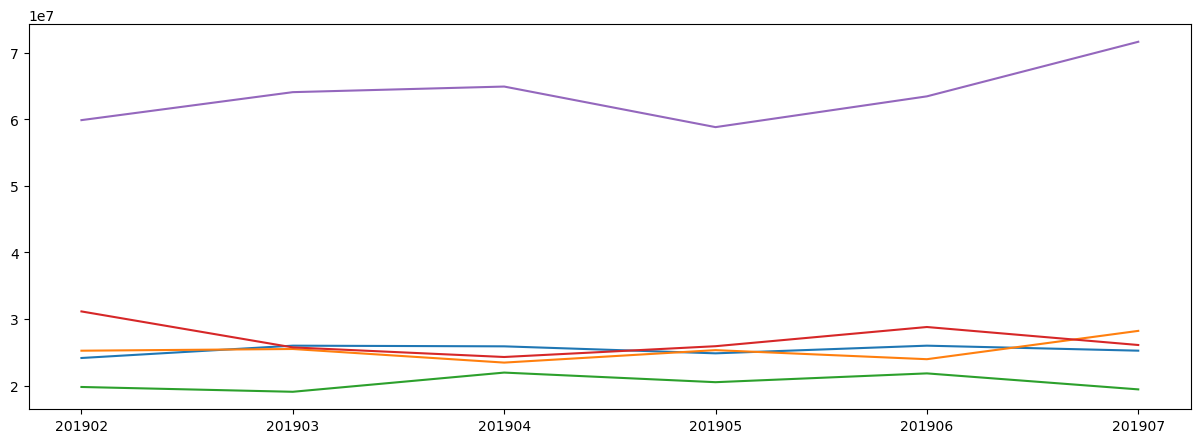

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

figure = plt.figure(figsize=(15,5))
plt.plot(list(graph.index),graph['PC-A'],label='PC-A')
plt.plot(list(graph.index),graph['PC-B'],label='PC-B')
plt.plot(list(graph.index),graph['PC-C'],label='PC-C')
plt.plot(list(graph.index),graph['PC-D'],label='PC-D')
plt.plot(list(graph.index),graph['PC-E'],label='PC-E')